**Attention layer with LSTM**

In [ ]:
#import the necesssary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label = 'Real IBM Stock Price')
    plt.plot(predicted, color='blue',label = 'Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/My Drive/IBM.csv')#, index_col='Date', parse_dates=['Date']) 
dataset.head()

# USE THE FOLLOWING COMMAND TO GET THE 'DATA' INSTEAD OF 'NUMBERS' ON X-AXIS ON PLOT.

#import pandas as pd
#dataset = pd.read_csv('/content/gdrive/My Drive/IBM.csv'), index_col='Date', parse_dates=['Date']) 
#dataset.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
#Getting "High" attribute
df2 = dataset['High']
df2.head

<bound method NDFrame.head of 0        82.55
1        82.50
2        82.90
3        85.03
4        84.25
         ...  
3015    153.00
3016    153.86
3017    153.18
3018    154.12
3019    154.72
Name: High, Length: 3020, dtype: float64>

In [ ]:
#In the above, no index is present. The data is presented as Date, values
#We need the index number for the mc learning model 
#Therefore, use 'reset_index' method to get the index.

#get attribute 'Close'
df1 = dataset.reset_index()['High']
df1

0        82.55
1        82.50
2        82.90
3        85.03
4        84.25
         ...  
3015    153.00
3016    153.86
3017    153.18
3018    154.12
3019    154.72
Name: High, Length: 3020, dtype: float64

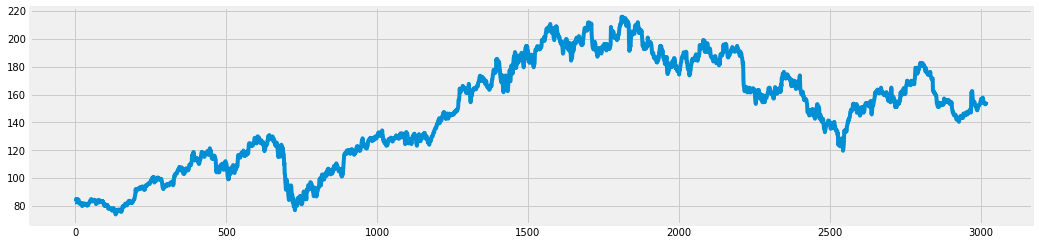

In [ ]:
#PLot data
#..........Method 2
dataset['High'].plot(figsize=(16,4) )
plt.show()

In [ ]:
# Reshape the dataset 
df1 = np.array(df1).reshape(-1 , 1)
df1[:5]

array([[82.55],
       [82.5 ],
       [82.9 ],
       [85.03],
       [84.25]])

In [ ]:
# split the data into train and test data
trainSize = int(len(df1)*0.67)
testSize = len(df1) - trainSize
trainData , testData = df1[0:trainSize , : ] , df1[trainSize : len(df1),:1]

#df1[a :b , c: d] format is present because dataset has rows and column.

In [ ]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [ ]:
trainData.shape

(2023, 1)

In [ ]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(60, 2023):
    xTrain.append(trainData[i-60 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [ ]:
xTrain.shape

(1963, 60)

In [ ]:
##Reshaping xTrain for efficient modelling
#xTrain = xTrain.reshape(-1 , 1)

#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [ ]:
xTrain.shape

(1963, 60, 1)

### **Attention**

In [ ]:
pip install attention

In [ ]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model
from attention import Attention

In [ ]:
# Attention layer
time_steps, input_dim, output_dim =  60, 1, 1

# Define/compile the model.
model_input = Input(shape=(time_steps, input_dim))
x = LSTM(64, return_sequences=True)(model_input)
x = Attention(32)(x)
x = Dense(1)(x)
model = Model(model_input, x)
model.compile(loss='mean_squared_error', optimizer='rmsprop')


# train.
model.fit(xTrain, yTrain, epochs=50, batch_size = 32)

Epoch 1/50
62/62 [==============================] - 5s 32ms/step - loss: 0.0143
Epoch 2/50
62/62 [==============================] - 2s 32ms/step - loss: 0.0028
Epoch 3/50
62/62 [==============================] - 2s 32ms/step - loss: 0.0023
Epoch 4/50
62/62 [==============================] - 2s 31ms/step - loss: 0.0016
Epoch 5/50
62/62 [==============================] - 2s 32ms/step - loss: 0.0016
Epoch 6/50
62/62 [==============================] - 2s 31ms/step - loss: 0.0012
Epoch 7/50
62/62 [==============================] - 2s 31ms/step - loss: 9.1588e-04
Epoch 8/50
62/62 [==============================] - 2s 31ms/step - loss: 9.6059e-04
Epoch 9/50
62/62 [==============================] - 2s 32ms/step - loss: 9.9353e-04
Epoch 10/50
62/62 [==============================] - 2s 32ms/step - loss: 9.0593e-04
Epoch 11/50
62/62 [==============================] - 2s 31ms/step - loss: 7.6492e-04
Epoch 12/50
62/62 [==============================] - 2s 32ms/step - loss: 8.1800e-04
Epoch 13/50
6

In [ ]:
#Get test set ready as similar to traing set
#create a whole dataset
dataset_total = (dataset["High"])
dataset_total.shape

(3020,)

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = (dataset["High"])
inputs = dataset_total[len(dataset_total)-len(testData) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]


array([[0.69252043],
       [0.70282841],
       [0.70810811],
       [0.73199246],
       [0.74720302]])

In [ ]:
inputs.shape

(1057, 1)

In [ ]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(60, 1057):
    xTest.append(inputs[i-60 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))


In [ ]:
# Predict model
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)

In [ ]:
inputs.shape

(1057, 1)

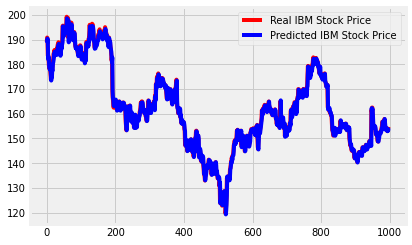

In [ ]:
plt.plot(testData, color='red',label='Real IBM Stock Price')
plt.plot(predicted_stock_price2, color='blue',label='Predicted IBM Stock Price')
plt.xlabel = 'Time'
plt.ylabel = 'IBM Stock price'
plt.legend()
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(testData, predicted_stock_price2))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.711204532807572.
